In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
import timeit
from scipy import optimize
from scipy import *
import scipy
from scipy import stats
import tables
import h5py
import ODE_utils as odeu
import matplotlib.animation as animation
#!jt -t onedork -cellw 90%

In [2]:
uscal=10
vscal=5
extraterms=True

In [3]:
rnputil=np.load('rnputil.npy')
urange=np.load('urange.npy')[::uscal]
vrange=np.load('vrange.npy')[::vscal]

In [4]:
with h5py.File('rnp.h5','r') as f:
    r_group_key = list(f.keys())[0]
    rnpi=f[r_group_key]
    rnp = np.asarray(rnpi[::uscal,::vscal],dtype=np.float_)    
with h5py.File('signp.h5','r') as f:
    sig_group_key = list(f.keys())[0]
    signpi=f[sig_group_key]
    signp = np.asarray(signpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('phinp.h5','r') as f:
    phi_group_key = list(f.keys())[0]
    phinpi=f[phi_group_key]
    phinp = np.asarray(phinpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('massnp.h5','r') as f:
    mass_group_key = list(f.keys())[0]
    massnpi=f[mass_group_key]
    massnp = np.asarray(massnpi[::uscal,::vscal])
    
    
if extraterms==True:
    with h5py.File('drnpu.h5','r') as f:
        dru_group_key = list(f.keys())[0]
        drnpui=f[dru_group_key]
        drnpu = np.asarray(drnpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('drnpv.h5','r') as f:
        drv_group_key = list(f.keys())[0]
        drnpvi=f[drv_group_key]
        drnpv = np.asarray(drnpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dsignpu.h5','r') as f:
        dsigu_group_key = list(f.keys())[0]
        dsignpui=f[dsigu_group_key]
        dsignpu = np.asarray(dsignpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dsignpv.h5','r') as f:
        dsigv_group_key = list(f.keys())[0]
        dsignpvi=f[dsigv_group_key]
        dsignpv = np.asarray(dsignpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dphinpu.h5','r') as f:
        dphiu_group_key = list(f.keys())[0]
        dphinpui=f[dphiu_group_key]
        dphinpu = np.asarray(dphinpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dphinpv.h5','r') as f:
        dphiv_group_key = list(f.keys())[0]
        dphinpvi=f[dphiv_group_key]
        dphinpv = np.asarray(dphinpvi[::uscal,::vscal],dtype=np.float_)
    
    

print(str(rnp.nbytes)+" bytes")

print(rnp)

switchax=rnputil[9]
print(switchax)
if switchax==True:
    rnp=np.swapaxes(rnp,0,1)
    signp=np.swapaxes(signp,0,1)
    #phinp=np.swapaxes(phinp,0,1)
    #massnp=np.swapaxes(massnp,0,1)
    print("Switched Axes")

#print(massnp[1])
print(rnp[:,4])

25616000 bytes
[[2.         2.00231136 2.00463085 ... 4.12971202 4.1297155  4.12971895]
 [1.99712224 1.99942343 2.00173276 ... 4.12970766 4.12971115 4.12971463]
 [1.9942572  1.99654822 1.99884737 ... 4.12970327 4.12970679 4.12971028]
 ...
 [1.52873117 1.52873119 1.5287312  ... 2.00062309 2.00293664 2.00525833]
 [1.52873115 1.52873117 1.52873118 ... 1.99775636 2.0000598  2.00237137]
 [1.52873113 1.52873115 1.52873116 ... 1.99490234 1.99719565 1.9994971 ]]
0.0
[2.00929423 2.00637581 2.00347009 ... 1.52873123 1.52873121 1.52873119]


In [5]:
print(rnputil)

M=massnp[1,-1]
print(M,massnp[1,-1])

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)

print('N='+str(N))

if M0>0.0:
    du0=M0/N
    dv0=du0
else:
    du0=1/N
    dv0=du0
    
#M=nan.max(massnp)

def fr(r,M,Q,Lambda):
    return 1-2*M/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.1,1.7,50.0],args=(M,Q,Lambda), method='hybr',tol=.0000001)
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]
print('---')
print(M,Q,Lambda)
print('---')
print(0.0,rminus,rplus,rcosm)


['160010000' '16001' '10000' '2.0' '0.04614583333333333' '1.0' '0.95'
 '0.1' 'True' '0.0' 'edd']
0.999999999985095 0.999999999985095
N=160010000
---
0.999999999985095 0.95 0.1
---
0.0 0.6767481333594706 1.5287287753568666 -6.335946328555623


In [6]:
def kappa(fr,r,M,Q,Lambda):
    return 0.5*np.abs(scipy.misc.derivative(fr,r,dx=.00000001,n=1,args=(M,Q,Lambda)))
#def kappa2(dfr,r,M,Q,Lambda):
    #return optimize.root(dfr,[0.01,1.5,50.0],args=(M,Q,Lambda),tol=10**(-10), method='hybr')

kappaplus=kappa(fr,rplus,M,Q,Lambda)
kappaminus=kappa(fr,rminus,M,Q,Lambda)
kappacosm=kappa(fr,rcosm,M,Q,Lambda)
print('k+: '+str(kappaplus),'k-: '+str(kappaminus),'kc: '+str(kappacosm))
###double-check for Lambda=0
###kappaminus
#print(np.abs((M*rminus-Q**2)/rminus**3.0))
#print(0.5*np.abs(dfr(rminus,M,Q,Lambda)))
###

#print(kappaplus-kappacosm)


k+: 0.12432613688551086 k-: 0.7509250825321612 kc: 0.23965663897840273


In [7]:
uval=1000#Nu-1#680#334#2100
print(0,Nu)

0 1601


In [8]:
dercorr=dr0v/0.5/np.abs(1-2*massnp[0][0]/rnp[0][0]+Q**2/rnp[0][0]**2-Lambda*(rnp[0][0])**2.0/3.0)
vrange2=vrange*dercorr
print(dercorr)

1.0


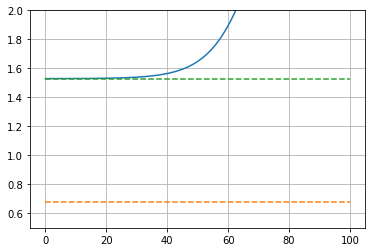

In [9]:
plt.plot(vrange,rnp[uval])
plt.plot([min(vrange),max(vrange)],[rminus,rminus],'--')
plt.plot([min(vrange),max(vrange)],[rplus,rplus],'--')
#plt.plot([min(vrange),max(vrange)],[rcosm,rcosm],'--')
#plt.ylim(rcosm-.0000001,rcosm+.0000001)
#plt.ylim(rminus-.001,rminus+.001)
plt.ylim(0.5,2.0)
#plt.yscale('log')
plt.grid()
plt.show()

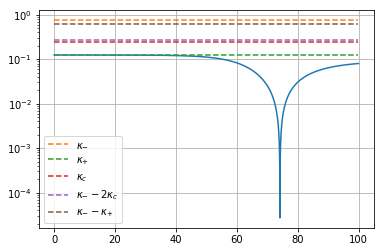

In [10]:
plt.plot(vrange2,np.abs(dsignpv[uval])/dercorr)
#plt.plot(vrange2,np.abs(dsignpu[uval])/dercorr)
plt.plot([min(vrange2),max(vrange2)],[kappaminus,kappaminus],'--',label=r'$\kappa_{-}$')
#plt.plot([min(vrange),max(vrange)],[kappaminus-kappacosm,kappaminus-kappacosm],'--',label=r'$\kappa_{-}-\kappa_{c}$')
#plt.plot([min(vrange),max(vrange)],[kappaminus-kappaplus,kappaminus-kappaplus],'--',label=r'$\kappa_{-}-\kappa_{+}$')
plt.plot([min(vrange2),max(vrange2)],[kappaplus,kappaplus],'--',label=r'$\kappa_{+}$')
plt.plot([min(vrange2),max(vrange2)],[kappacosm,kappacosm],'--',label=r'$\kappa_{c}$')
plt.plot([min(vrange2),max(vrange2)],[kappaminus-2*kappacosm,kappaminus-2*kappacosm],'--',label=r'$\kappa_{-}-2\kappa_{c}$')
plt.plot([min(vrange2),max(vrange2)],[kappaminus-kappaplus,kappaminus-kappaplus],'--',label=r'$\kappa_{-}-\kappa_{+}$')
#plt.plot([min(vrange),max(vrange)],[kappaplus-kappacosm,kappaplus-kappacosm],'--',label=r'$\kappa_{c}$')
plt.yscale('log')
#plt.ylim(1,2)
#plt.ylim(.1,2.)
plt.legend(loc='best')
plt.grid()
plt.show()

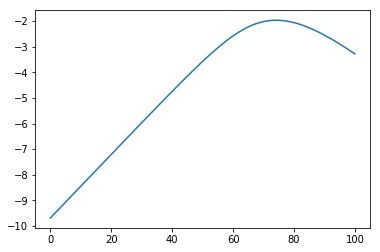

1601 2000
0.0 [-0.07954968  4.67396647]
-0.08008363591909733


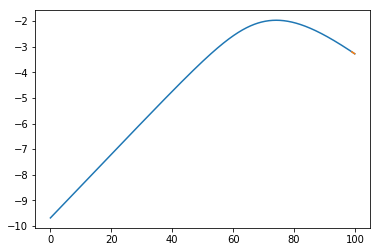

0.07955173991652516
0.0 0.23965663897840273 0.7509250825321612 0.12432613688551086
0.0 0.5112684435537584
0.0 0.6265989456466503


In [11]:
plt.plot(vrange2,signp[uval])
plt.show()
print(Nu,Nv)
vrange2=vrange*dr0v/0.5/np.abs(1-2*massnp[0][0]/rnp[0][0]+Q**2/rnp[0][0]**2-Lambda*(rnp[0][0])**2.0/3.0)
v1=Nv-20
v2=Nv-1
print(0.0,np.polyfit(vrange2[v1:v2],signp[uval][v1:v2],1.0))
print(dsignpv[uval][v2])

plt.plot(vrange2,signp[uval])
plt.plot(vrange2[v1:v2],signp[uval][v1:v2])
plt.show()

print(np.abs(dsignpv[uval][int((v1+v2)/2)]))
print(0.0,kappacosm,kappaminus,kappaplus)
print(0.0,kappaminus-kappacosm)
print(0.0,kappaminus-kappaplus)

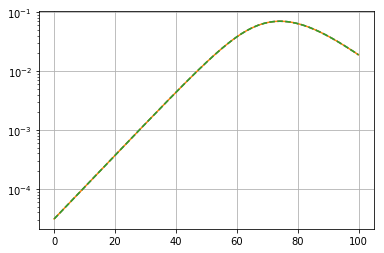

0 3.10463171766729e-05


In [12]:
plt.plot(vrange2,np.abs(drnpu[uval])/dercorr,'--')
plt.plot(vrange2,drnpv[uval]/dercorr)
plt.plot(vrange2,np.abs(drnpv[uval])/dercorr,'--')
#plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)))
plt.yscale('log')
plt.grid()
plt.show()

print(0,nanmin(drnpv[uval]))

2000
0.0 [-0.06920606  2.99001573]


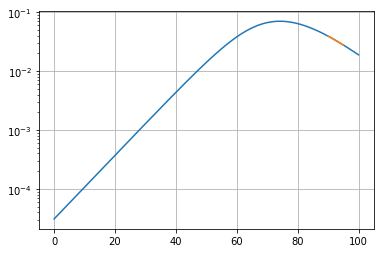

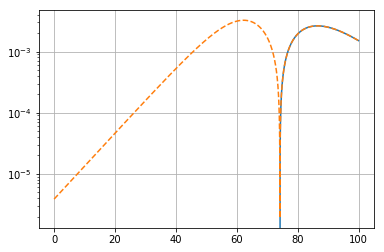

/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


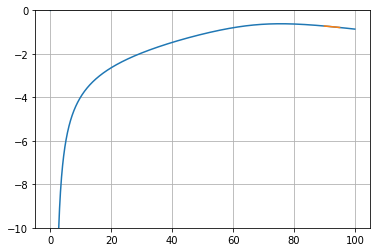

0.0 0.23965663897840273 0.12432613688551086 0.7509250825321612
0.6265989456466503
0.5112684435537584


In [13]:
v1=Nv-200
v2=Nv-100
print(Nv)
print(0.0,np.polyfit(vrange2[v1:v2],np.log(np.abs(drnpv[uval][v1:v2]/dercorr)),1.0))
plt.plot(vrange2,np.abs(drnpv[uval]/dercorr))
#plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)),'-.')
plt.plot(vrange2[v1:v2],np.abs(drnpv[uval][v1:v2]/dercorr))
#plt.plot(vrange2[v1:v2-1],np.log(np.abs(np.diff(rnp[uval][v1:v2])/np.diff(vrange2[v1:v2]))),'-.')
plt.yscale('log')
#plt.xscale('log')
plt.grid()
plt.show()

Rfunc=-drnpv[uval]*drnpu[uval]/rnp[uval]-np.exp(signp[uval])/(4.0*rnp[uval])*(1.0-np.power((Q/rnp[uval]),2.0)-Lambda*np.power(rnp[uval],2.0))
    #plt.plot(vrange2,Rfunc/dercorr)
plt.plot(vrange2,(Rfunc))
plt.plot(vrange2,np.abs(Rfunc),'--')
    #plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)))
#plt.yscale('log')
plt.grid()
plt.yscale('log')
plt.show()

plt.plot(vrange2,np.log(np.abs(drnpv[uval])/dercorr)/np.log(vrange2))
plt.plot(vrange2[v1:v2],np.log(np.abs(drnpv[uval][v1:v2])/dercorr)/np.log(vrange2[v1:v2]))
plt.ylim(-10,0)

plt.grid()
plt.show()



#print(0.0,np.polyfit(np.log(vrange2[v1:v2-1]),np.log(np.abs(np.diff(rnp[uval][v1:v2])/np.diff(vrange2[v1:v2]))),1.0))
print(0.0,kappacosm,kappaplus,kappaminus)
print(kappaminus-kappaplus)
print(kappaminus-kappacosm)

0.0 1601


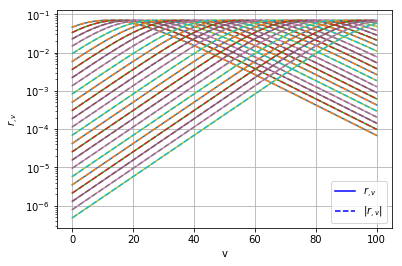

0.0 1601


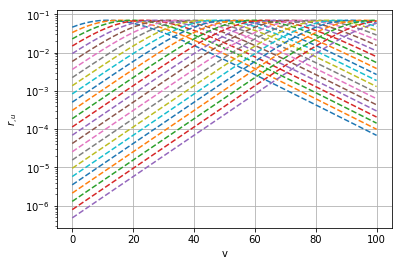

In [14]:
print(0.0,Nu)
numlines=25
ims=[]
for i in range(numlines):
    i=int(i*Nu/numlines)
    plt.plot(vrange2,(drnpv[i])/dercorr)
    plt.plot(vrange2,np.abs(drnpv[i])/dercorr,'--')
    #ims=ims.append([plt.imshow(np.abs(drnpv[i]),animated=True)])
    #plt.plot(vrange2,drnpv[i]/dercorr)
#plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)),'-.')
plt.plot([np.nan],[np.nan],'b',label=r'$r_{,v}$')
plt.plot([np.nan],[np.nan],'b--',label=r'$|r_{,v}|$')
plt.xlabel('v')
plt.ylabel(r'$r_{,v}$')
plt.yscale('log')
#plt.xscale('log')
#plt.xlim(0,10)
plt.legend(loc='best')
plt.grid()
plt.savefig('num-rel-pics/drdv_vs_v.png',dpi=300)
plt.show()

print(0.0,Nu)
numlines=25
for i in range(numlines):
    i=int(i*Nu/numlines)
    #plt.plot(vrange2,drnpu[i]/dercorr)
    plt.plot(vrange2,np.abs(drnpu[i])/dercorr,'--')
    #plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)))
plt.yscale('log')
plt.xlabel('v')
plt.ylabel(r'$r_{,u}$')
#plt.xlim(0,6)
plt.grid()
#plt.savefig('num-rel-pics/Tol=.05_N=100_Nv=100.png',dpi=300)
#plt.savefig('num-rel-pics/drdu_vs_v.png',dpi=300)
plt.show()

#numlines=2
#for i in range(numlines):
    #i=int(i*Nu/numlines)
#print(urange[i])

#ani = animation.ArtistAnimation(plt.figure(), ims, interval=50, blit=True,
                                #repeat_delay=1000)

89.99999999999999 99.49999999999999
0.0 [nan nan]
0.23965663897840273


/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


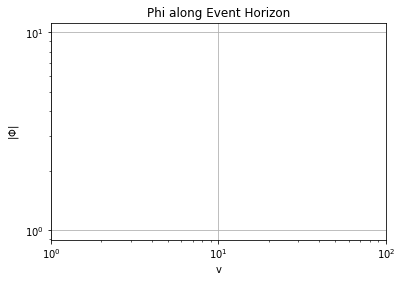

/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


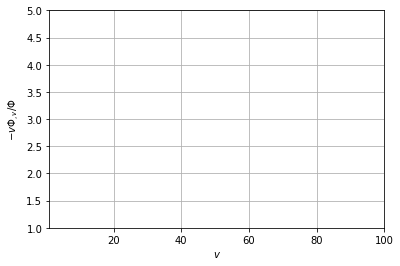

/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


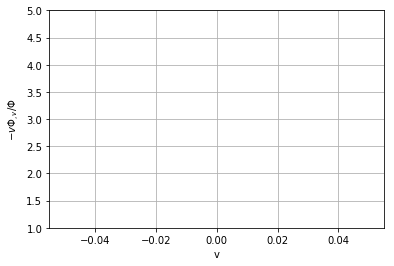

0.0 [-3.39809504e-12  3.63377051e-10]


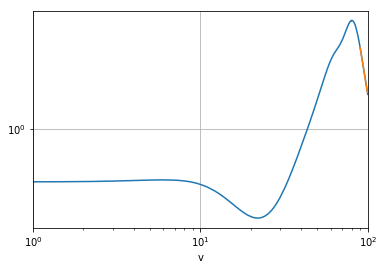

In [15]:
v1=Nv-200
v2=Nv-10
print(vrange2[v1],vrange2[v2])
print(0.0,np.polyfit(np.log(vrange2[v1:v2]),np.log(np.abs(phinp[uval][v1:v2])),1.0))
print(kappacosm)
plt.plot(vrange2,np.abs(phinp[uval])/dercorr)
plt.plot(vrange2[v1:v2],np.abs(phinp[uval][v1:v2])/dercorr)
plt.xlim(1,vrange2[-1])
plt.yscale('log')
plt.ylabel(r'$|\Phi|$')
plt.xlabel('v')
plt.xscale('log')
#plt.legend(loc='best')
plt.grid()
plt.title('Phi along Event Horizon')
#plt.savefig('num-rel-pics/Phi vs v_bug_fixed.png',dpi=300)
plt.show()

plt.plot(vrange2,-vrange2*dphinpv[uval]/phinp[uval]/dercorr)
plt.plot(vrange2[v1:v2],-vrange2[v1:v2]*dphinpv[uval][v1:v2]/phinp[uval][v1:v2]/dercorr)
plt.ylim(1.0,5.0)
#plt.xscale('log')
plt.ylabel(r'$-v \Phi_{,v} /\Phi$')
plt.xlabel(r'$v$')
plt.xlim(1,vrange2[-1])
plt.grid()
#plt.savefig('num-rel-pics/Power of Phi vs v_bug_fixed.png',dpi=300)
plt.show()

numlines=25
for i in range(numlines):
    i=int(i*Nu/numlines)
    plt.plot(vrange2,-vrange2*dphinpv[i]/phinp[i]/dercorr)
    plt.ylim(1.0,5.0)
#plt.xscale('log')
plt.grid()
plt.ylabel(r'$-v \Phi_{,v} /\Phi$')
plt.xlabel('v')
#plt.savefig('num-rel-pics/Powers of Phi vs v_bug_fixed.png',dpi=300)
plt.show()

print(0.0,np.polyfit(vrange2[v1:v2],np.log(np.abs(massnp[uval][v1:v2])),1.0))
plt.plot(vrange2,np.abs(massnp[uval])/dercorr)
plt.plot(vrange2[v1:v2],np.abs(massnp[uval][v1:v2])/dercorr)
plt.xlim(1,vrange[-1])
plt.yscale('log')
plt.xlabel('v')
plt.xscale('log')
#plt.legend(loc='best')
plt.grid()
#plt.savefig('num-rel-pics/Phi vs v_changed_method.png',dpi=300)
plt.show()

0.0 1601


/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


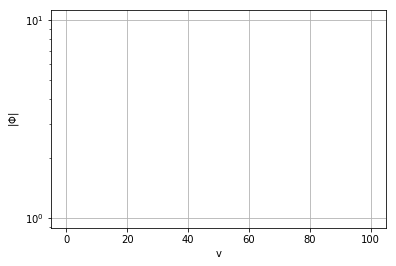

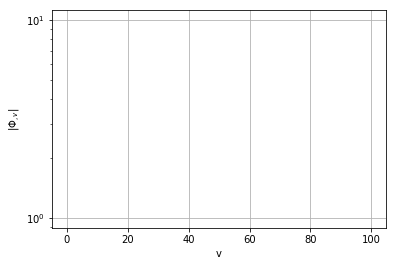

0.0 1601


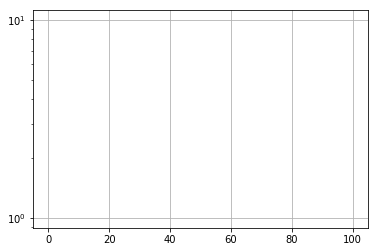

In [16]:
print(0.0,Nu)
numlines=15
for i in range(int(numlines*10/10)):
    i=int(i*Nu/numlines)
    
    plt.plot(vrange2,np.abs(phinp[i])/dercorr,'--')
    #plt.plot(vrange2,drnpv[i]/dercorr)
#plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)),'-.')
#plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$|\Phi|$')
plt.xlabel('v')
#plt.xlim(.5,vrange2[-1])
plt.grid()
#plt.savefig('num-rel-pics/Phis vs v.png',dpi=300)
plt.show()


numlines=50
for i in range(numlines):
    i=int(i*Nu/numlines)
    
    plt.plot(vrange2,np.abs(dphinpv[i])/dercorr,'--')
    #plt.plot(vrange2,drnpv[i]/dercorr)
#plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)),'-.')
plt.yscale('log')
plt.ylabel(r'$|\Phi_{,v}|$')
plt.xlabel('v')
#plt.xlim(0,10)
plt.grid()
#plt.savefig('num-rel-pics/dPhidv vs v.png',dpi=300)
#plt.savefig('num-rel-pics/drdv_Mf='+str(M)+'_Q='+str(Q)+'_Lambda='+str(Lambda)+'_edd.png',dpi=300)
plt.show()

print(0.0,Nu)
numlines=50
for i in range(numlines):
    i=int(i*Nu/numlines)
    #plt.plot(vrange2,drnpu[i]/dercorr)
    plt.plot(vrange2,np.abs(dphinpu[i])/dercorr,'--')
    #plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)))
plt.yscale('log')
#plt.xlim(0,6)
plt.grid()
#plt.savefig('num-rel-pics/Tol=.05_N=100_Nv=100.png',dpi=300)
#plt.savefig('num-rel-pics/drdu_Mf='+str(M)+'_Q='+str(Q)+'_Lambda='+str(Lambda)+'_edd.png',dpi=300)
plt.show()

0.0 [nan nan]


/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


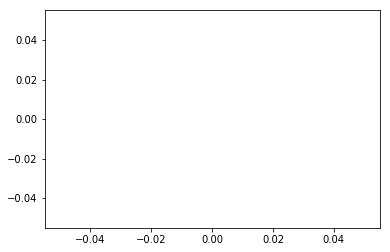

0.0 0.23965663897840273


In [17]:
v1=Nv-10
v2=Nv-1
print(0.0,np.polyfit(vrange2[v1:v2],np.log(np.abs(dphinpv[uval][v1:v2]/dercorr)),1.0))
plt.plot(vrange2,np.log(np.abs(dphinpv[uval])))
plt.plot(vrange2[v1:v2],np.log(np.abs(dphinpv[uval][v1:v2])))
plt.show()
print(0.0,kappacosm)

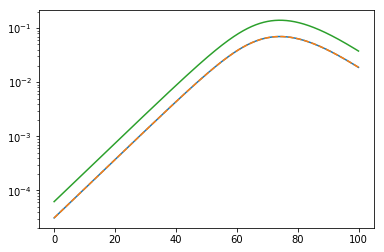

0 2000 0.7509250825321612
0.0 [-3.17768201e-12  3.41835240e-10]


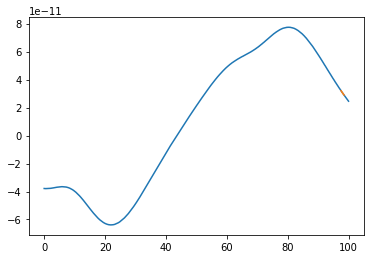

0.7509250825321612
0.2716118045753557


In [18]:
#plt.plot(vrange2,np.abs(massnp[uval]))
plt.plot(vrange2,np.abs(drnpv[uval]))
plt.plot(vrange2,np.abs(drnpu[uval]),'--')
plt.plot(vrange2,np.abs(np.exp(signp[uval])))
#plt.ylim(massnp[uval,-1]-.00000000001,massnp[uval,-1]+.00000000001)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(100,300)
plt.show()
print(0,Nv,kappaminus)
v1=Nv-50
v2=Nv-30
uval2=uval
print(0.0,np.polyfit(vrange2[v1:v2],np.log(np.abs(massnp[uval2][v1:v2])),1.0))
plt.plot(vrange2,np.log(np.abs(massnp[uval2])))
plt.plot(vrange2[v1:v2],np.log(np.abs(massnp[uval2][v1:v2])))
plt.show()

print(kappaminus)
print(kappaminus-2*kappacosm)

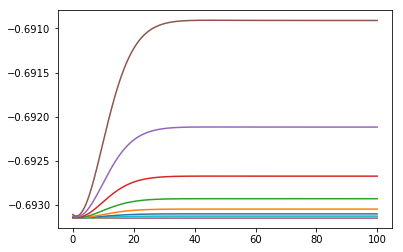

In [19]:
for i in range(int(Nu/100)):
    i2=100*i
    plt.plot(vrange,np.log(np.abs(np.exp(-signp[i2])*drnpv[i2])))#*drnpv[i2])))
plt.show()


2000
[-6.97515157e-10 -6.93101118e-01]


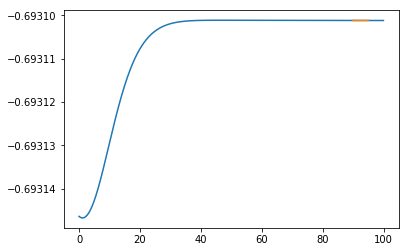

0.7509250825321612 0.2716118045753557 0.5022728087611394


In [20]:
print(Nv)
uval2=uval
v1=Nv-200
v2=Nv-100
print(np.polyfit(vrange2[v1:v2],np.log(np.abs(np.exp(-signp[uval2][v1:v2])*drnpv[uval2][v1:v2])),1.0))
plt.plot(vrange2,np.log(np.abs(np.exp(-signp[uval2])*drnpv[uval2])))
plt.plot(vrange2[v1:v2],np.log(np.abs(np.exp(-signp[uval2][v1:v2])*drnpv[uval2][v1:v2])))
plt.show()

print(kappaminus,kappaminus-2*kappacosm,kappaminus-2*kappaplus)

In [21]:
print(massnp[0,-1])

0.9999999999850944


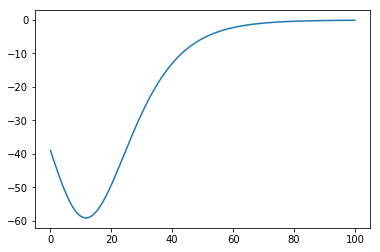

In [22]:
rnp2=rnp[0,-100]+10**(-15)*np.random.random(Nv)

dsignpv3=2*((massnp[0,-100]*rnp2-Q**2-1/3*Lambda*rnp2**4)/(rnp2**3-2*massnp[0,-100]*rnp2**2+Q**2*rnp2-Lambda/3*rnp2**5))*drnpv[0]
plt.plot(vrange,dsignpv3)
#plt.ylim(-1,1)
plt.show()
#print(dsignpv2)

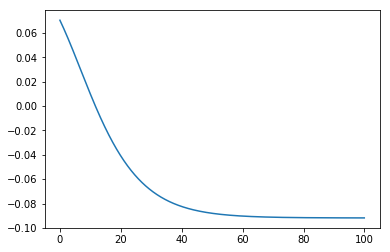

[ 0.07052083  0.07025717  0.06999278 ... -0.09183569 -0.09183587
 -0.09183605]


In [23]:
dsignpv2=2*((massnp[0,0]*rnp[0]-Q**2-1/3*Lambda*rnp[0]**4)/(rnp[0]**3-2*massnp[0,0]*rnp[0]**2+Q**2*rnp[0]-Lambda/3*rnp[0]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
plt.show()
print(dsignpv2)

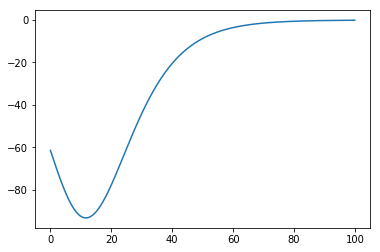

[-61.44978381 -61.66643447 -61.88303202 ...  -0.09268332  -0.09225871
  -0.09183605]


In [24]:
massnp2=massnp[0,-1]+10**(-19)*np.random.random(Nv)

dsignpv2=2*((massnp2*rnp[0,-1]-Q**2-1/3*Lambda*rnp[0,-1]**4)/(rnp[0,-1]**3-2*massnp2*rnp[0,-1]**2+Q**2*rnp[0,-1]-Lambda/3*rnp[0,-1]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
#plt.ylim(-.12,-.09)
plt.show()
print(dsignpv2)

In [25]:
Rfunc=-drnpv[uval]*drnpu[uval]/rnp[uval]-np.exp(signp[uval])/(4.0*rnp[uval])*(1.0-np.power((Q/rnp[uval]),2.0)-Lambda*np.power(rnp[uval],2.0))

0.0 1601
0.005625
4.005624999999743
8.00562500000178
12.005624999998142
16.005624999994506
20.005624999990868
24.00562499998723
28.005624999983592
32.00562499997996
36.00562499997632
40.00562499997268
44.005624999969044
48.005624999965406
52.00562499996177
56.00562499995813
60.00562499995449
64.00562499995085
68.00562499994722
72.00562499994358
76.00562499993994
80.0056249999363
84.00562499993266
88.00562499992903
92.00562499992539
96.00562499992175


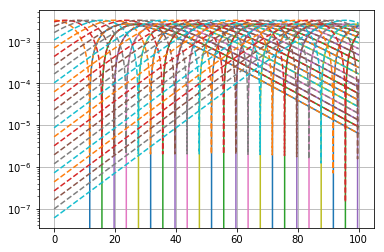

In [26]:
print(0.0,Nu)
numlines=25
for i in range(numlines):
    i=int(i*Nu/numlines)
    print(urange[i])
    Rfunc=-drnpv[i]*drnpu[i]/rnp[i]-np.exp(signp[i])/(4.0*rnp[i])*(1.0-np.power((Q/rnp[i]),2.0)-Lambda*np.power(rnp[i],2.0))
    #plt.plot(vrange2,Rfunc/dercorr)
    plt.plot(vrange2,(Rfunc))
    plt.plot(vrange2,np.abs(Rfunc),'--')
    #plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)))
plt.yscale('log')
plt.grid()
plt.show()
#plt.plot(vrange2,Rfunc)
#plt.plot(vrange2,np.abs(Rfunc),'--')
#plt.yscale('log')
#plt.show


In [27]:
r2=1.56
print(1-Q**2.0/r2**2.0-Lambda*r2**2.0)

0.3857902301117686


In [28]:
print(np.nanmin(massnp[:,0]),np.nanmax(massnp[:,0]))

0.999999999962107 1.0


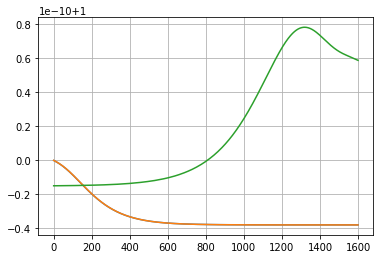

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


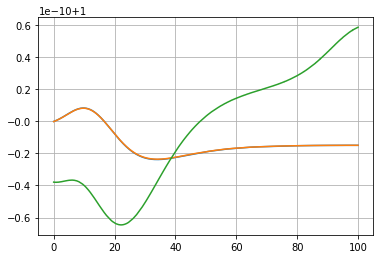

In [29]:
#plt.plot(urange,massnp[:,0])
#plt.plot(urange,massnp[:,1])
#plt.plot(urange,massnp[:,-1])
plt.plot(massnp[:,0])
plt.plot(massnp[:,1])
plt.plot(massnp[:,-1])
#plt.yscale('log')
plt.grid()
plt.show()
print(massnp)

plt.plot(vrange2,massnp[0])
plt.plot(vrange2,massnp[1])
plt.plot(vrange2,massnp[-1])
#plt.yscale('log')
plt.grid()
plt.show()

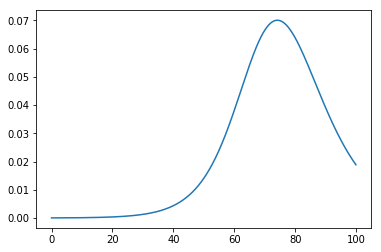

In [30]:
plt.plot(vrange2,np.abs(drnpv[uval]))
plt.show()

In [31]:
print(len(rnp),len(drnpv),len(drnpu),len(dphinpv),len(dphinpu),len(massnp))
rnpf=np.delete(rnp,-1,axis=0)
massnpf=np.delete(massnp,-1,axis=0)
print(len(rnpf),len(drnpv),len(drnpu),len(dphinpv),len(dphinpu),len(massnpf))
Curvature=odeu.Kretsch(rnp,drnpv,drnpu,dphinpv,dphinpu,massnp,Q,Lambda)


1601 1601 1601 1601 1601 1601
1600 1601 1601 1601 1601 1600


0.0 1440


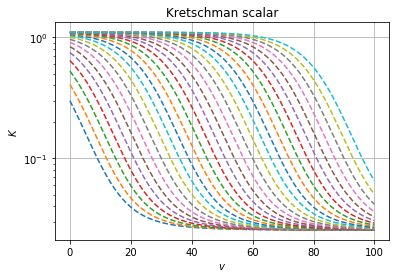

In [32]:
#plt.plot(vrange2,Curvature[30])
#plt.show()
Nuf=int(Nu*9/10)

print(0.0,Nuf)
numlines=30
for i in range(numlines):
    i=int(i*Nuf/numlines)
   
    plt.plot(vrange2,Curvature[i],'--')
plt.xlabel(r'$v$')
plt.ylabel(r'$K$')
plt.yscale('log')
plt.grid()
plt.title('Kretschman scalar')
#plt.savefig('num-rel-pics/K vs v.png',dpi=300)
plt.show()

print(rminus)
odeu.Kretsch(rminus,1,1,0,0,M0,Q,Lambda)

/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


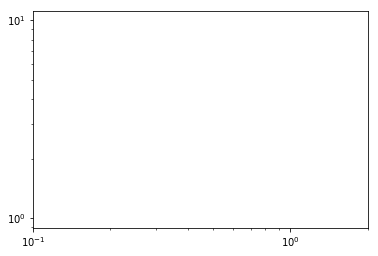

In [33]:
plt.plot(rnp[uval],phinp[uval])
#plt.ylim(0,.0001)
#plt.xlim(min(rnp[uval])+.1,1)
plt.yscale('log')
plt.xlim(.1,2)
plt.xscale('log')
plt.show()

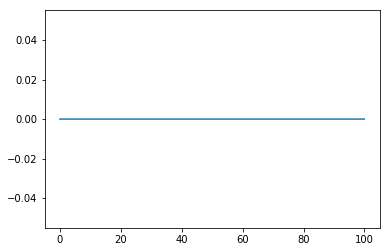

In [34]:
plt.plot(vrange2,np.abs(phinp[uval])/dercorr,label=r'$\Phi$')
#plt.xlim(0,2)

In [35]:
print(drnpv[0])

[4.61458333e-02 4.63085276e-02 4.64711819e-02 ... 6.96007145e-05
 6.92818553e-05 6.89644563e-05]


In [36]:
print(0.5*np.exp(signp))
print(drnpu)
print(drnpv)

[[4.61458333e-02 4.63085276e-02 4.64711819e-02 ... 6.96007143e-05
  6.92818552e-05 6.89644562e-05]
 [4.59424188e-02 4.61051543e-02 4.62678575e-02 ... 7.00013518e-05
  6.96806580e-05 6.93614328e-05]
 [4.57389633e-02 4.59017306e-02 4.60644732e-02 ... 7.04042945e-05
  7.00817555e-05 6.97606935e-05]
 ...
 [2.97894331e-07 2.99751898e-07 3.01621048e-07 ... 4.59691981e-02
  4.61311053e-02 4.62929712e-02]
 [2.95588552e-07 2.97431741e-07 2.99286423e-07 ... 4.57660309e-02
  4.59279751e-02 4.60898854e-02]
 [2.93300620e-07 2.95129542e-07 2.96969869e-07 ... 4.55628303e-02
  4.57248019e-02 4.58867473e-02]]
[[-4.61458333e-02 -4.63085276e-02 -4.64711819e-02 ... -6.96007145e-05
  -6.92818553e-05 -6.89644563e-05]
 [-4.59424188e-02 -4.61051543e-02 -4.62678575e-02 ... -7.00013520e-05
  -6.96806582e-05 -6.93614330e-05]
 [-4.57389633e-02 -4.59017306e-02 -4.60644732e-02 ... -7.04042946e-05
  -7.00817557e-05 -6.97606937e-05]
 ...
 [-2.97894334e-07 -2.99751901e-07 -3.01621051e-07 ... -4.59691980e-02
  -4.61311

In [37]:
print(0.5*np.exp(signp[:,0]))
print(drnpu[:,0])

[4.61458333e-02 4.59424188e-02 4.57389633e-02 ... 2.97894331e-07
 2.95588552e-07 2.93300620e-07]
[-4.61458333e-02 -4.59424188e-02 -4.57389633e-02 ... -2.97894334e-07
 -2.95588555e-07 -2.93300624e-07]


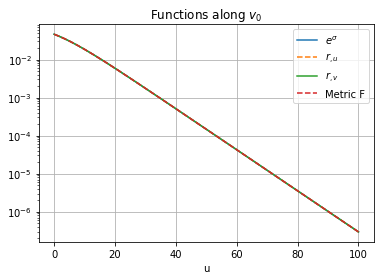

In [58]:
plt.plot(urange,0.5*np.exp(signp[:,0]),label=r'$e^{\sigma}$')
plt.plot(urange,np.abs(drnpu[:,0]),'--',label=r'$r_{,u}$')
plt.plot(urange,np.abs(drnpv[:,0]),label=r'$r_{,v}$')
plt.plot(urange,0.5*np.abs(1-2*massnp[:,0]/rnp[:,0]+Q**2.0/rnp[:,0]**2.0-Lambda*rnp[:,0]**2.0/3),'--',label=r'Metric F')
#plt.xlim(0,10)
plt.yscale('log')
plt.xlabel('u')
plt.grid()
plt.legend(loc='best')
plt.title(r'Functions along $v_{0}$')
#plt.savefig('num-rel-pics/esig_drdu_drdv_vs_u_v0.png',dpi=300)
plt.show()


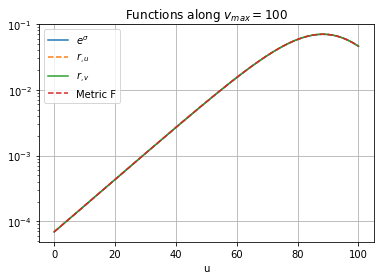

In [51]:
plt.plot(urange,0.5*np.exp(signp[:,-1]),label=r'$e^{\sigma}$')
plt.plot(urange,np.abs(drnpu[:,-1]),'--',label=r'$r_{,u}$')
plt.plot(urange,np.abs(drnpv[:,-1]),label=r'$r_{,v}$')
plt.plot(urange,0.5*np.abs(1-2*massnp[:,-1]/rnp[:,-1]+Q**2.0/rnp[:,-1]**2.0-Lambda*rnp[:,-1]**2.0/3),'--',label=r'Metric F')
plt.yscale('log')
plt.yscale('log')
plt.xlabel('u')
plt.grid()
plt.legend(loc='best')
plt.title(r'Functions along $v_{max}=100$')
#plt.savefig('num-rel-pics/esig_drdu_drdv_vs_u_vmax.png',dpi=300)
plt.show()

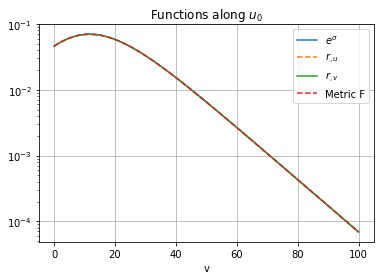

In [55]:
plt.plot(vrange,0.5*np.exp(signp[0]),label=r'$e^{\sigma}$')
plt.plot(vrange,np.abs(drnpu[0]),'--',label=r'$r_{,u}$')
plt.plot(vrange,np.abs(drnpv[0]),label=r'$r_{,v}$')
plt.plot(vrange,0.5*np.abs(1-2*massnp[0]/rnp[0]+Q**2.0/rnp[0]**2.0-Lambda*rnp[0]**2.0/3),'--',label=r'Metric F')
#plt.xlim(0,10)
plt.yscale('log')
plt.xlabel('v')
plt.grid()
plt.legend(loc='best')
plt.title(r'Functions along $u_{0}$')
#plt.savefig('num-rel-pics/esig_drdu_drdv_vs_u_u0.png',dpi=300)
plt.show()

0.0 1601 2000


/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


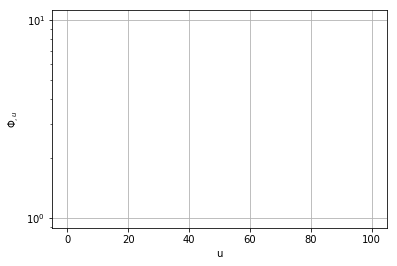

In [41]:
print(0.0,Nu,Nv)
numlines=50
for i in range(numlines):
    i=int(i*Nv/numlines)
    #plt.plot(vrange2,drnpu[i]/dercorr)
    plt.plot(urange,dphinpu[:,i],'--')
    #plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)))
plt.yscale('log')
plt.xlabel('u')
plt.ylabel(r'$\Phi_{,u}$')
#plt.xlim(0,6)
plt.grid()
#plt.savefig('num-rel-pics/Tol=.05_N=100_Nv=100.png',dpi=300)
#plt.savefig('num-rel-pics/dphidu_vs_u.png',dpi=300)
plt.show()

0.0 [nan nan]


/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


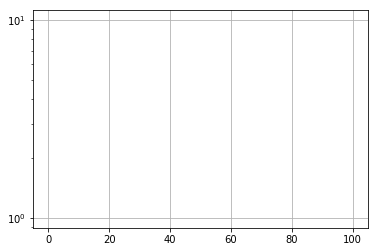

0.23965663897840273 0.12432613688551086 0.7509250825321612



In [42]:
vval=Nv-10
u1=Nu-50
u2=Nu-10
print(0.0,np.polyfit(urange[u1:u2],np.log(np.abs(dphinpu[u1:u2,vval])),1.0))
plt.plot(urange,np.abs(dphinpu[:,vval]))
plt.plot(urange[u1:u2],np.abs(dphinpu[u1:u2,vval]))
plt.yscale('log')
#plt.xscale('log')
plt.grid()
plt.show()
print(kappacosm,kappaplus,kappaminus)
print()

